# 1. What is Boosting in Machine Learning?
Boosting is an ensemble technique that combines multiple weak learners sequentially, where each new model focuses on correcting the errors of the previous models, to create a strong learner.

# 2. How does Boosting differ from Bagging?
- Bagging trains models in parallel on different bootstrap samples, reducing variance.
- Boosting trains models sequentially, where each model corrects errors from the previous one, reducing bias.

# 3. What is the key idea behind AdaBoost?
AdaBoost assigns higher weights to misclassified samples so that the next model focuses more on these difficult examples.

# 4. Explain the working of AdaBoost with an example.
1. Train a base model on the data.
2. Calculate errors and assign higher weights to misclassified samples.
3. Train the next model using the updated weights.
4. Combine models using weighted majority voting (classification) or weighted sum (regression).

# 5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting builds models sequentially, where each model fits the residual errors of the previous model using gradient descent on a loss function.  
Difference: AdaBoost adjusts sample weights, while Gradient Boosting fits residuals directly.

# 6. What is the loss function in Gradient Boosting?
It depends on the task:
- Regression: Mean Squared Error (MSE)
- Classification: Log Loss / Deviance

# 7. How does XGBoost improve over traditional Gradient Boosting?
- Uses regularization to prevent overfitting
- Parallel processing
- Handles missing values
- Tree pruning
- Efficient memory usage

# 8. What is the difference between XGBoost and CatBoost?
- XGBoost: Requires manual encoding for categorical features.
- CatBoost: Automatically handles categorical features and reduces overfitting via ordered boosting.

# 9. What are some real-world applications of Boosting techniques?
- Credit risk scoring
- Fraud detection
- Customer churn prediction
- Medical diagnosis
- Product recommendation

# 10. How does regularization help in XGBoost?
Regularization terms in the objective function control model complexity and prevent overfitting.

# 11. What are some hyperparameters to tune in Gradient Boosting models?
- learning_rate
- n_estimators
- max_depth
- subsample
- min_samples_split

# 12. What is the concept of Feature Importance in Boosting?
Feature importance shows how much each feature contributes to reducing the loss function across all trees in the model.

# 13. Why is CatBoost efficient for categorical data?
CatBoost uses ordered boosting and target-based encoding internally, avoiding the need for one-hot encoding and preventing overfitting.



In [12]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
print("Accuracy:", ada_clf.score(X_test, y_test))



Accuracy: 0.9333333333333333


In [13]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

ada_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_reg.fit(X_train_h, y_train_h)
y_pred_h = ada_reg.predict(X_test_h)
print("MAE:", mean_absolute_error(y_test_h, y_pred_h))


MAE: 0.6497879664773323


In [14]:


# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_c, y_train_c)
print("Feature Importances:", gb_clf.feature_importances_)



Feature Importances: [1.29234808e-05 2.78045836e-02 2.01183642e-04 4.25403304e-04
 2.46660446e-03 2.99604699e-03 9.22233287e-04 4.50527588e-01
 5.19940461e-04 1.06691601e-04 6.87020789e-03 3.60401381e-03
 1.15680237e-03 8.41527251e-03 5.56452892e-04 2.51063498e-03
 1.30679228e-02 2.03810848e-03 7.02862580e-04 4.22393330e-03
 7.55888752e-02 3.98864800e-02 5.14082111e-02 3.82446946e-02
 4.81083076e-03 4.50121585e-04 1.87249757e-02 2.40103086e-01
 1.47800843e-03 1.75306929e-04]


In [15]:


# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_h, y_train_h)
y_pred_gb = gb_reg.predict(X_test_h)
print("R2 Score:", r2_score(y_test_h, y_pred_gb))


R2 Score: 0.7756446042829697


In [16]:


# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train_c, y_train_c)
print("XGBoost Accuracy:", xgb_clf.score(X_test_c, y_test_c))
print("Gradient Boosting Accuracy:", gb_clf.score(X_test_c, y_test_c))



XGBoost Accuracy: 0.956140350877193
Gradient Boosting Accuracy: 0.956140350877193


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:31:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:

# 19. Train a CatBoost Classifier and evaluate using F1-Score.
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train_c, y_train_c)
y_pred_cat = cat_clf.predict(X_test_c)
print("F1 Score:", f1_score(y_test_c, y_pred_cat))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00
F1 Score: 0.9790209790209791


In [19]:


# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_h, y_train_h)
y_pred_xgb = xgb_reg.predict(X_test_h)
print("MSE:", mean_squared_error(y_test_h, y_pred_xgb))



MSE: 0.2225899267544737


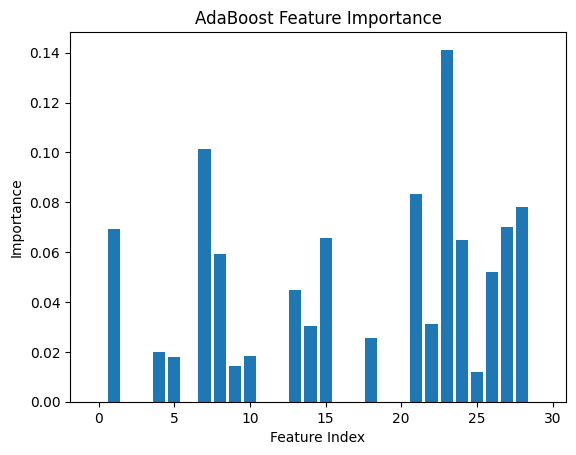

In [20]:
# 21. Train an AdaBoost Classifier and visualize feature importance.
import matplotlib.pyplot as plt

ada_clf.fit(X_train_c, y_train_c)
plt.bar(range(len(ada_clf.feature_importances_)), ada_clf.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importance")
plt.show()


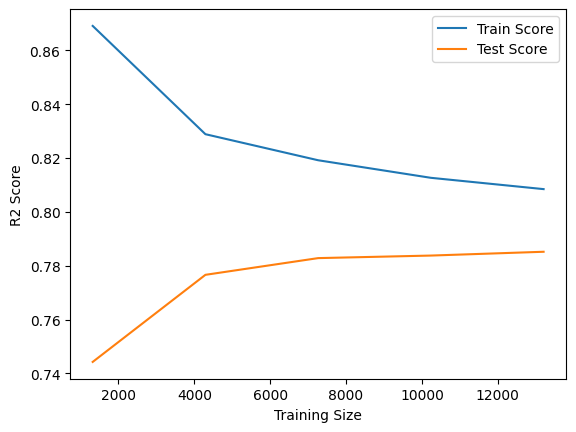

In [21]:

# 22. Train a Gradient Boosting Regressor and plot learning curves.
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train_h, y_train_h, cv=5, scoring='r2')
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score')
plt.xlabel("Training Size")
plt.ylabel("R2 Score")
plt.legend()
plt.show()


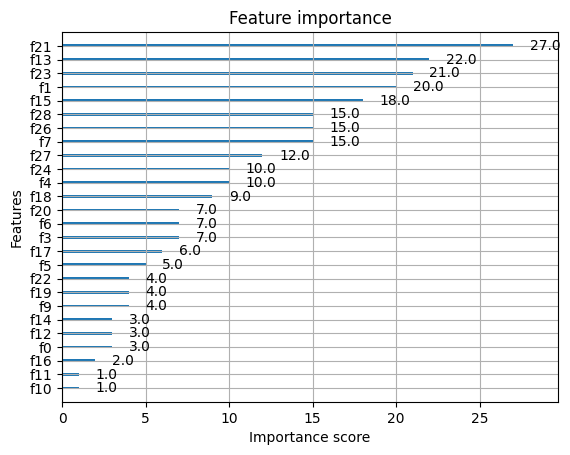

In [22]:

# 23. Train an XGBoost Classifier and visualize feature importance.
from xgboost import plot_importance

plot_importance(xgb_clf)
plt.show()


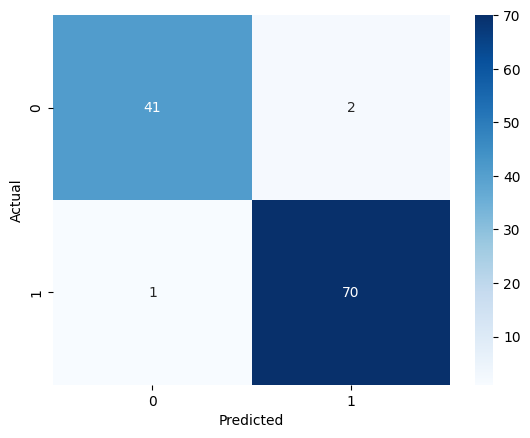

In [23]:

# 24. Train a CatBoost Classifier and plot the confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_c, y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [24]:
# 25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.
for n in [10, 50, 100]:
    ada_temp = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_temp.fit(X_train_c, y_train_c)
    print(f"n_estimators={n}, Accuracy={ada_temp.score(X_test_c, y_test_c)}")



n_estimators=10, Accuracy=0.9649122807017544
n_estimators=50, Accuracy=0.9649122807017544
n_estimators=100, Accuracy=0.9736842105263158


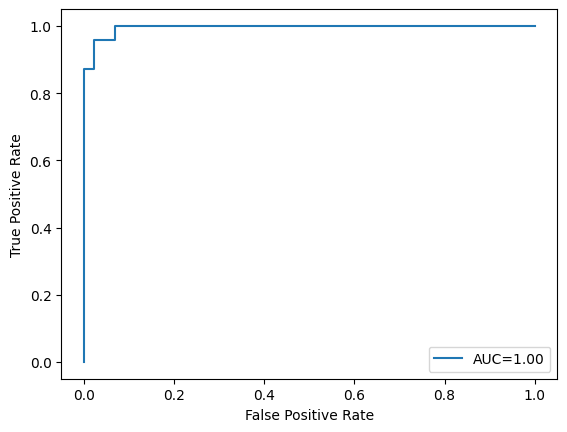

In [25]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve.
from sklearn.metrics import roc_curve, auc

y_prob_gb = gb_clf.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, y_prob_gb)
plt.plot(fpr, tpr, label=f"AUC={auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [26]:

# 27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.2]}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3)
grid_xgb.fit(X_train_h, y_train_h)
print("Best Params:", grid_xgb.best_params_)
print("Best Score:", grid_xgb.best_score_)


Best Params: {'learning_rate': 0.2}
Best Score: 0.8287918294273543


In [27]:

# 28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], n_features=20, random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

cat_no_weight = CatBoostClassifier(verbose=0, random_state=42)
cat_no_weight.fit(X_train_i, y_train_i)
cat_weight = CatBoostClassifier(class_weights=[1, 10], verbose=0, random_state=42)
cat_weight.fit(X_train_i, y_train_i)

print("Without class weight:", f1_score(y_test_i, cat_no_weight.predict(X_test_i)))
print("With class weight:", f1_score(y_test_i, cat_weight.predict(X_test_i)))


Without class weight: 0.7096774193548387
With class weight: 0.6486486486486487


In [28]:

# 29. Train an AdaBoost Classifier and analyze the effect of different learning rates.
for lr in [0.01, 0.1, 1]:
    ada_lr = AdaBoostClassifier(learning_rate=lr, random_state=42)
    ada_lr.fit(X_train_c, y_train_c)
    print(f"Learning Rate={lr}, Accuracy={ada_lr.score(X_test_c, y_test_c)}")


Learning Rate=0.01, Accuracy=0.9385964912280702
Learning Rate=0.1, Accuracy=0.956140350877193
Learning Rate=1, Accuracy=0.9649122807017544


In [29]:

# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
from sklearn.metrics import log_loss
iris_xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
iris_xgb.fit(X_train, y_train)
y_prob_multi = iris_xgb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob_multi))


Log Loss: 0.009289027880442384


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:36:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
